In [81]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [83]:
st.header("Diabetes Detection App")

DeltaGenerator()

In [85]:
image = Image.open("D:\\Data Science Masterclass\\image.png")

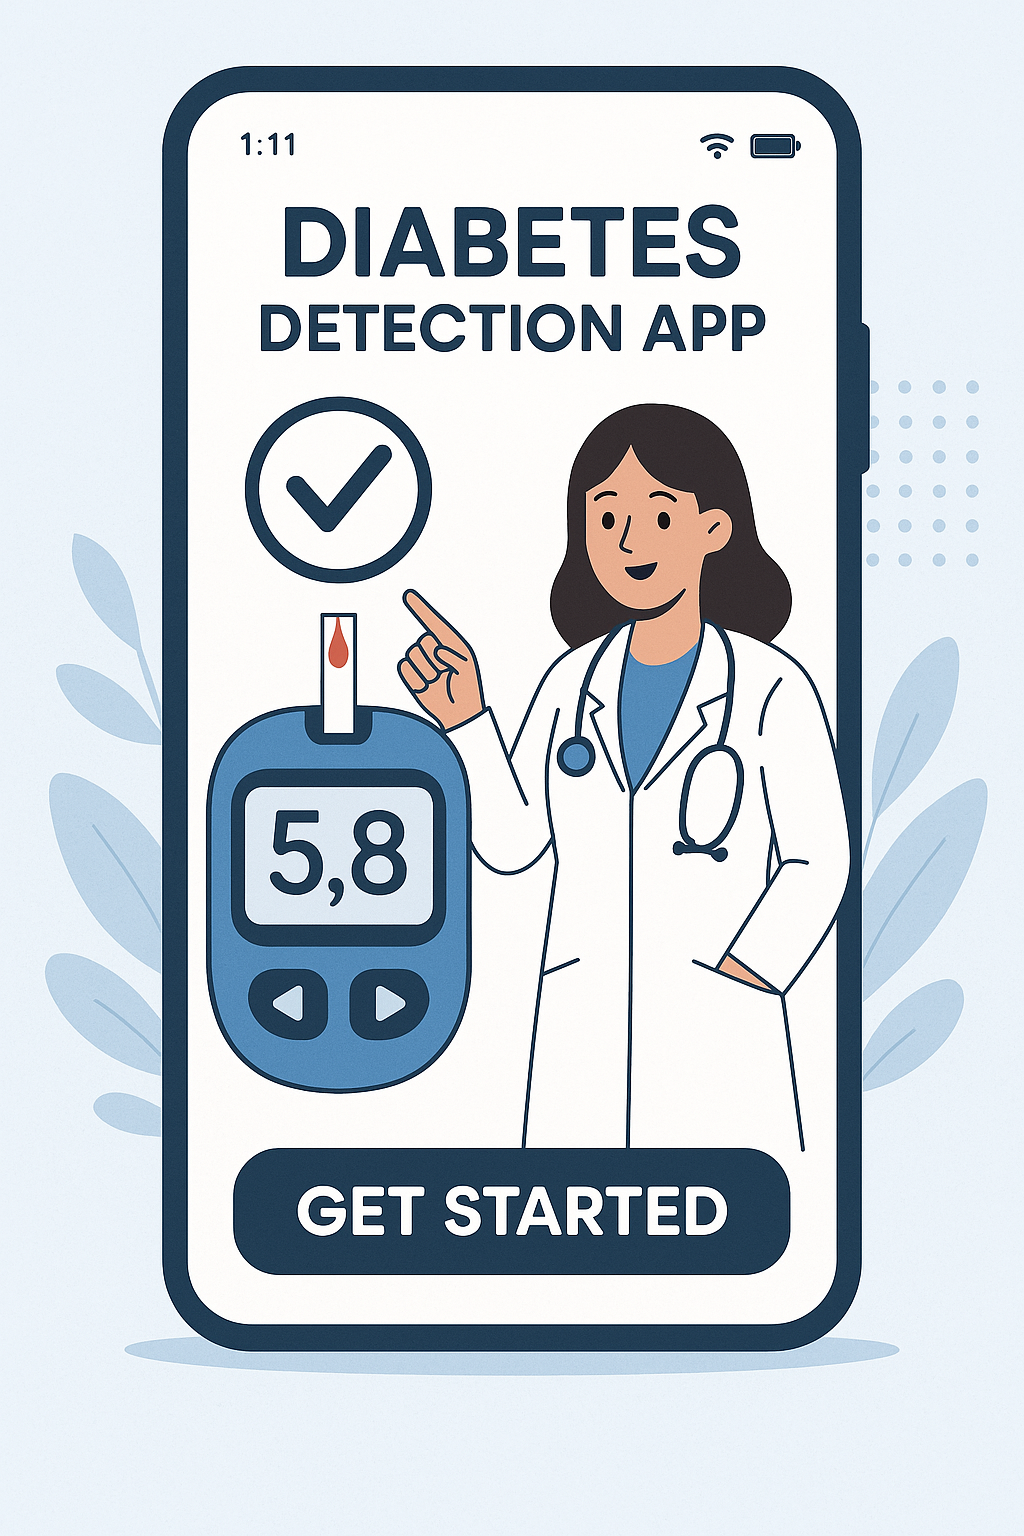

In [87]:
image

In [88]:
data = pd.read_csv("D:\\Data Science Masterclass\\diabetes.csv")

In [91]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [93]:
st.subheader("Data")

DeltaGenerator()

In [95]:
st.dataframe(data)

DeltaGenerator()

In [97]:
st.subheader("Data Description")

DeltaGenerator()

In [99]:
data.iloc[:,:8].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [101]:
st.write(data.iloc[:,:8].describe())

In [103]:
data.shape

(768, 9)

In [105]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [107]:
data.duplicated().sum()

0

In [201]:
df = data.iloc[:,:8]

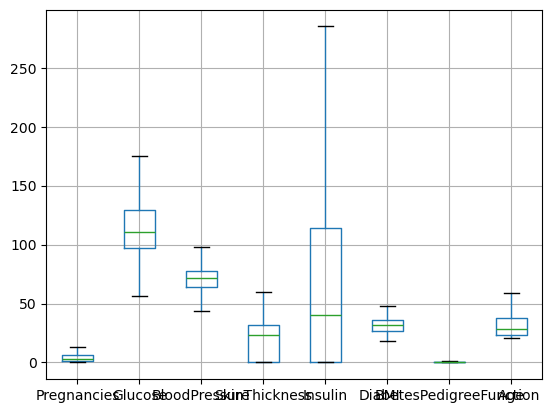

In [203]:
df.boxplot()
plt.show()

In [205]:
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)

In [207]:
IQR = Q3-Q1
IQR

Pregnancies                   5.0000
Glucose                      32.0000
BloodPressure                14.0000
SkinThickness                32.0000
Insulin                     114.2500
BMI                           8.6500
DiabetesPedigreeFunction      0.3205
Age                          15.0000
dtype: float64

In [209]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [211]:
out_rows = ((df<LL)| (df>UL)).any(axis=1)
out_rows

0      False
1      False
3      False
5      False
6      False
       ...  
762    False
764    False
765    False
766    False
767    False
Length: 556, dtype: bool

In [213]:
data = data[~out_rows]

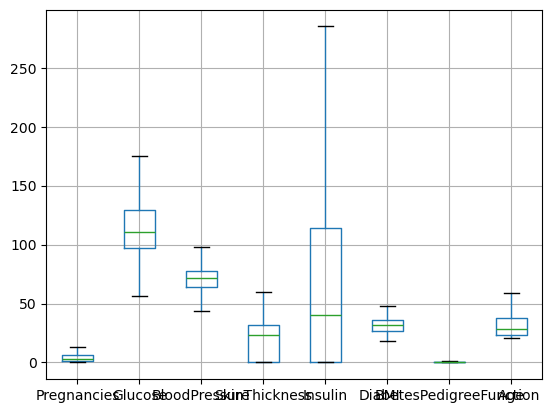

In [215]:
df.boxplot()
plt.show()

In [217]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
3                       0.167   21        0  
5                       0.201   30        0  
6                       0.248   26        1  
..                        ...  ...      ...  
762                     0.142   33        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[556 rows x 9 columns]

In [221]:
x=data.iloc[:,:8].values
y=data.iloc[:,8].values

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [225]:
model = RandomForestClassifier(n_estimators=500)

In [227]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [229]:
y_pred = model.predict(x_test)

In [231]:
st.subheader("Accuracy of Trained Model")

DeltaGenerator()

In [233]:
st.write(accuracy_score(y_test,y_pred))

In [239]:
st.subheader("Enter Your Input Data")

DeltaGenerator()

In [247]:
def user_input():
    preg = st.slider("Pregnancies:",0,20,0)           
    glu = st.slider("Glucose:",0,200,0)                   
    bp = st.slider("Blood Pressure:",0,100,0)               
    sthick = st.slider("Skin Thickness:",0,100,0)               
    ins = st.slider("Insulin:",0.0,1000.0,0.0)                     
    bmi = st.slider("BMI:",0.0,70.0,0.0)                         
    dpf = st.slider("Diabetes Pedigree Function:",0.000,3.000,0.000)    
    age = st.slider("Age:",0,100,0)       

    input_dict={
        "Pregnancies":preg,             
        "Glucose":glu,                      
        "BloodPressure":bp,                
        "SkinThickness":sthick,               
        "Insulin":ins,                  
        "BMI":bmi,                           
        "DiabetesPedigreeFunction":dpf,      
        "Age":age                          
    }
    return pd.DataFrame(input_dict,index=["User Input Values"])

In [249]:
ui = user_input()

In [251]:
st.subheader("Entered Input Data")

DeltaGenerator()

In [253]:
st.write(ui)

In [257]:
st.subheader("Predictions (0 - Non Diabetes, 1 - Diabetes)")

DeltaGenerator()

In [259]:
st.write(model.predict(ui))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [263]:
%history -f main.py